In [0]:
import os
import cv2
import io
import pickle
import requests
import zipfile
import numpy as np
from scipy import ndimage
from skimage.transform import resize
from imageio import imread, imsave
from skimage import img_as_float, color, exposure
from skimage.feature import peak_local_max, hog
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.svm import LinearSVC
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
r = requests.get('https://github.com/mf00589/COM2028/raw/master/signaturetest.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [0]:
DATADIR = './signaturetest'
CATEGORIES = ['Signature1','signature2']

training_data2 = []

def create_training_data2():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (60,60))
      training_data2.append([new_array, class_num])

create_training_data2()


In [0]:
import random 

random.shuffle(training_data2)

In [0]:
X1 = []
y1 = []

In [0]:
for features, label in training_data2:
  X1.append(features)
  y1.append(label)


X1 = np.array(X1).reshape(-1, 60 , 60)

In [0]:
X1 = X1 / 255.0
X1.shape
y1 = np.array(y1)

In [0]:
from sklearn.model_selection import  train_test_split
import tensorflow as tf
from tensorflow import keras

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1)

In [0]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(60, 60)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(35)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=8,validation_data=(X_test, y_test))

Epoch 1/8
3/3 [==============================] - 0s 40ms/step - loss: 3.0994 - accuracy: 0.3500 - val_loss: 1.7241 - val_accuracy: 0.4074
Epoch 2/8
3/3 [==============================] - 0s 14ms/step - loss: 1.8384 - accuracy: 0.5375 - val_loss: 1.4100 - val_accuracy: 0.5926
Epoch 3/8
3/3 [==============================] - 0s 14ms/step - loss: 1.2046 - accuracy: 0.5375 - val_loss: 0.9801 - val_accuracy: 0.4074
Epoch 4/8
3/3 [==============================] - 0s 14ms/step - loss: 1.0180 - accuracy: 0.5375 - val_loss: 0.9023 - val_accuracy: 0.5926
Epoch 5/8
3/3 [==============================] - 0s 14ms/step - loss: 0.8329 - accuracy: 0.5125 - val_loss: 0.8724 - val_accuracy: 0.4074
Epoch 6/8
3/3 [==============================] - 0s 14ms/step - loss: 0.8245 - accuracy: 0.4625 - val_loss: 0.6981 - val_accuracy: 0.5926
Epoch 7/8
3/3 [==============================] - 0s 16ms/step - loss: 0.5851 - accuracy: 0.6625 - val_loss: 0.6665 - val_accuracy: 0.5556
Epoch 8/8
3/3 [===================

In [0]:
import matplotlib.pyplot as plt

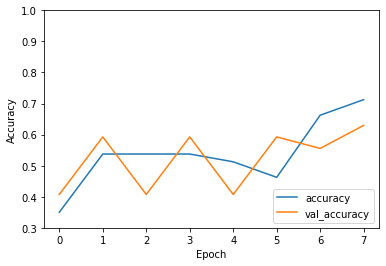

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')